Import Libraries

In [46]:
!pip install proplot

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import proplot

Mount Drive

In [49]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [50]:
%cd /content/gdrive/MyDrive/Utility-Scoring-Of-Product-Reviews/Data

/content/gdrive/MyDrive/Utility-Scoring-Of-Product-Reviews/Data


Read dataset obtained from previous step where utility score is predcited

In [51]:
df=pd.read_csv("Cell_Phones_and_Accessories.csv")

In [52]:
df.head(4)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,preProcessed_reviewText,subjectivity_score,flesch_index,polarity_score,entropy_score,daleChall_index,helpful_ratio,lexDiversity_ratio,normalized_flesch_index,normalized_polarity_score,normalized_entropy_score,normalized_daleChall_index,utility_score,gradientBoosting_regressor,randomForest_regressor
0,6073894996,"[3, 4]",4.0,This is a nice charger but you can tell it was...,"03 20, 2013",A29OXVQRZ154KX,this is a nice charger but you can tell it was...,0.650000,31.0,0.352083,5.632935,6.568111,0.666667,0.059278,0.013262,0.676042,0.384745,0.393515,0.428571,0.422608,0.420120
1,9861203192,"[25, 25]",5.0,"Bought this for my new AT&T; Galaxy SII, the c...","10 7, 2011",A1847XXVEA8QUK,bought this for my new att galaxy sii the case...,0.562121,34.1,0.266970,5.800280,7.892625,0.966667,0.055556,0.014807,0.633485,0.416500,0.477973,0.500000,0.488521,0.477867
2,9985537742,"[10, 11]",3.0,Works fine IF you don't move the phone. If yo...,"11 19, 2010",A2TOXBTDH3Y6R9,works fine if you dont move the phone if you ...,0.500000,25.1,0.280476,5.381458,7.162129,0.846154,0.068452,0.010320,0.640238,0.337025,0.431393,0.476190,0.474947,0.481599
3,998554627X,"[5, 5]",5.0,was somewhat concerned after reading some of t...,"02 23, 2013",A17X3JUWJY3AXG,was somewhat concerned after reading some of t...,0.575000,16.9,0.375000,5.064869,8.279561,0.857143,0.108696,0.006232,0.687500,0.276950,0.502646,0.500000,0.486851,0.485753


Make groups of dataset based on distinct values  of column 'overall' and compute average values of each semantic score for each group

In [54]:
groupedData=df.groupby(['overall']).mean()
groupedData

,subjectivity_score,flesch_index,polarity_score,entropy_score,daleChall_index,helpful_ratio,lexDiversity_ratio,normalized_flesch_index,normalized_polarity_score,normalized_entropy_score,normalized_daleChall_index,utility_score,gradientBoosting_regressor,randomForest_regressor
overall,,,,,,,,,,,,,,
1.0,0.484238,59.103723,0.054027,5.775360,7.501782,0.655842,0.064841,0.027273,0.527014,0.411772,0.453051,0.377793,0.390408,0.392701
2.0,0.500586,88.074388,0.114199,6.118482,7.472139,0.682166,0.049249,0.041716,0.557100,0.476882,0.451161,0.385485,0.402988,0.403642
3.0,0.506030,99.715965,0.144617,6.238965,7.432191,0.743456,0.043628,0.047520,0.572309,0.499745,0.448613,0.422706,0.428591,0.429240
4.0,0.518328,119.390755,0.181107,6.392677,7.473809,0.792129,0.039053,0.057329,0.590553,0.528913,0.451267,0.453487,0.450276,0.450383
5.0,0.534129,89.593952,0.238140,6.071549,7.583518,0.791947,0.054920,0.042474,0.619070,0.467976,0.458263,0.458085,0.452905,0.452196


Add column 'overall' to grouped data

In [55]:
groupedData['overall']=[1,2,3,4,5]

Visualize line plot on grouped data for 'utility_score' column vs 'overall' column

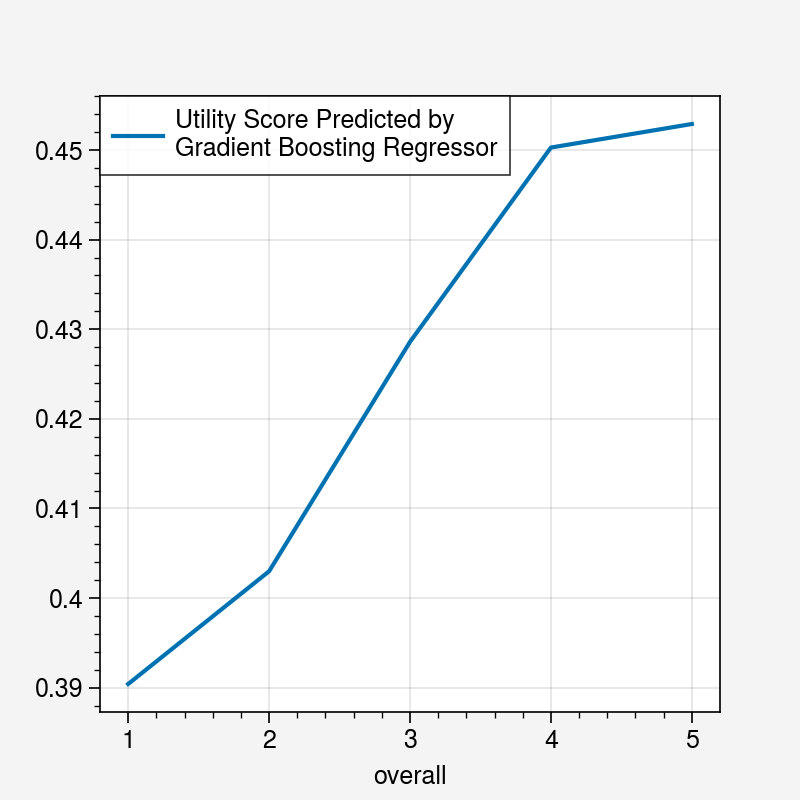

In [59]:
lines=groupedData.plot.line(x='overall',y='gradientBoosting_regressor', label ='Utility Score Predicted by \nGradient Boosting Regressor')

Compute covariance between 'overall' and 'gradientBoosting_regressor' columns

In [63]:
covariance = cov(df['overall'].astype(int).values, df['gradientBoosting_regressor'])
print(covariance)

[[2.00913232 0.03137222]
 [0.03137222 0.00416836]]


Compute pearson correlation between 'overall' and 'gradientBoosting_Regressor' columns

In [64]:
corr, _ = pearsonr(df['overall'].astype(int).values, df['gradientBoosting_regressor'])
print('Pearsons correlation between rating and gradientBoosting_Regressor score is: %.3f' % corr)

Pearsons correlation between rating ans gradientBoosting_Regressor score is: 0.343


Compute covariance between 'overall' and 'gradientBoosting_regressor' columns

In [68]:
covariance = cov(df['utility_score'], df['gradientBoosting_regressor'])
print(covariance)

[[0.00661935 0.00430308]
 [0.00430308 0.00416836]]


In [67]:
corr, _ = pearsonr(df['utility_score'], df['gradientBoosting_regressor'])
print('Pearsons correlation between rating and gradientBoosting_Regressor score is: %.3f' % corr)

Pearsons correlation between rating ans gradientBoosting_Regressor score is: 0.819
